# PRINCIPAL COMPONENT ANALYSIS

### Tarea 1: Importar librerías

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Configurar el estilo del plot
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

### Tarea 2: Preprocessing (data loading)

In [6]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# PCA ---> reducir la dimensionalidad (lineas transformation method)
# Transformar los datos (dataset) y proyectarlos en espacios lineales
# PCA direcciones en los proyectos los datos ---> principal components
# eigen vectors (maximizar la varianza de los datos)

#Summary: Dataset projected onto subspace
iris = pd.read_csv('iris.data')
iris.head(10)




,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [8]:
# Eliminar el header del dataset
iris = pd.read_csv('iris.data', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.columns = ["sepal_length","sepal_width","petal_length","petal_width", "species"]
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**Ejercicio:** Verificar Valores duplicados en el dataset 

In [37]:
iris.duplicated().values.any()

False

In [22]:
iris=iris.drop_duplicates()

### Tarea 3: Visualizar la Data (longitud y ancho del cepalo)

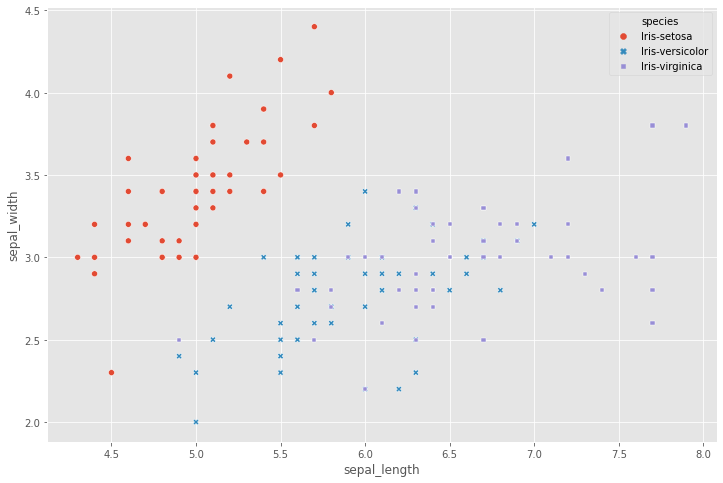

In [25]:
sns.scatterplot(x=iris.sepal_length, y= iris.sepal_width, hue = iris.species,
               style= iris.species);

### Tarea 4: Análisis de PCA (estandarizar/normalizar la data)

In [26]:
# Separar la matriz de caracteristicas en el dataset (variables o features en el dataset)
# Separar X y Y 
X = iris.iloc[:,0:4].values
Y = iris.species.values

In [27]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [28]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
    

In [29]:
# Normalización standard scaler
from sklearn.preprocessing import StandardScaler

# feature ---> media cero, desviación estandar unidad
# features tengan un peso normalizado para la proyección

X = StandardScaler().fit_transform(X)
X;

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

El cálculo de los eigen vector y values
- Eigen Decomposition
- Singular Value Decomposition (SVD)

### Tarea 5: Cálculo de los Eigenvectors y EigenValues

In [30]:
#Eigen Decomposition

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [33]:
# Cálculo de la covarianza 
covariance_matrix = np.cov(X.T)
print("Covariance matrix: \n",covariance_matrix)
# Symetric Positive Semi-defined Matrix
# Cada Columna es independiente a cada otra (ortonormal)

Covariance matrix: 
 [[ 1.00684932 -0.1100696   0.8772724   0.82265459]
 [-0.1100696   1.00684932 -0.42394135 -0.35881709]
 [ 0.8772724  -0.42394135  1.00684932  0.96847099]
 [ 0.82265459 -0.35881709  0.96847099  1.00684932]]


In [35]:
# Obtener a partir de la matriz de covarianza los eigen vectors
# y eigen values 

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen vectors: \n", eigen_vectors, "\n")
print("Eigen values: \n", eigen_values)

Eigen vectors: 
 [[ 0.52230226 -0.37279119 -0.72000204  0.26424259]
 [-0.26361895 -0.92535433  0.2418424  -0.1254459 ]
 [ 0.58130506 -0.02079959  0.13827615 -0.80158063]
 [ 0.56549963 -0.06567705  0.63560131  0.52144767]] 

Eigen values: 
 [2.92947202 0.92751016 0.14912023 0.02129485]


### Tarea 6: Singular Value Decomposition (SVD) / otra vía para realizar PCA (componente más efectiva)

In [38]:
eigen_vectors_svd, s , v = np.linalg.svd(X.T)

In [40]:
eigen_vectors_svd 

# el signo no importa, lo que se necesita es encontrar la dirección (nos da el eje)
# el signo no importa, son los mismos componentes principales

array([[-0.52230226, -0.37279119,  0.72000204,  0.26424259],
       [ 0.26361895, -0.92535433, -0.2418424 , -0.1254459 ],
       [-0.58130506, -0.02079959, -0.13827615, -0.80158063],
       [-0.56549963, -0.06567705, -0.63560131,  0.52144767]])

### Tarea 7: Selección de los componentes principales (eigenvectors)

In [41]:
# Como selecciono los componentes principales ??
# De acuerdo al valor del autovalor (ordenando de mayor a menor)
for val in eigen_values:
    print(val)

2.929472022268895
0.9275101577729449
0.14912022978813505
0.021294850443996795


In [43]:
# Impacto de los componentes principales (eigen vectors) sobre la data
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained 

[72.73859102912563, 23.030014121573124, 3.7026451614060747, 0.5287496878951586]

In [44]:
# El 72.74 % de la data (dataset - X) es explicado con la primera componente principal

In [46]:
# Podría seleccionar los dos primeras componentes principales
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.73859103,  95.76860515,  99.47125031, 100.        ])

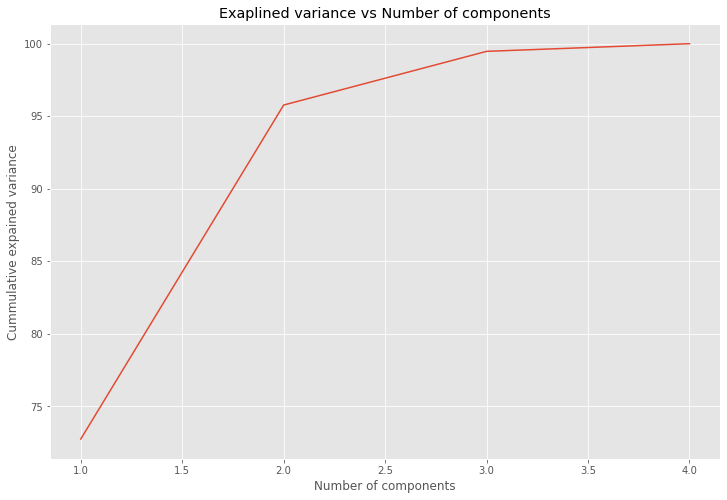

In [48]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cummulative expained variance")
plt.title("Exaplined variance vs Number of components")
#plt.grid()
plt.show()

### Tares 8: Proyectar los datos en un subespacio lineal de menor orden (reducción de dimensionalidad)

In [49]:
# Puedo reducir la dimensionalidad de X?
# Sí. Porque ya tengo los componenetes principales

In [50]:
eigen_vectors

array([[ 0.52230226, -0.37279119, -0.72000204,  0.26424259],
       [-0.26361895, -0.92535433,  0.2418424 , -0.1254459 ],
       [ 0.58130506, -0.02079959,  0.13827615, -0.80158063],
       [ 0.56549963, -0.06567705,  0.63560131,  0.52144767]])

In [51]:
#XPCA = X . componentes principles (eigenvectors)
projection_matrix = (eigen_vectors.T[:][:])[:2].T
print("Projection matrix: \n ", projection_matrix)

Projection matrix: 
  [[ 0.52230226 -0.37279119]
 [-0.26361895 -0.92535433]
 [ 0.58130506 -0.02079959]
 [ 0.56549963 -0.06567705]]


In [53]:
X_pca = X.dot(projection_matrix)
X_pca

array([[-2.29165366, -0.48657587],
       [-2.11542834,  0.66601465],
       [-2.39606952,  0.33249272],
       [-2.33243473,  0.5877082 ],
       [-2.41539508, -0.65393005],
       [-2.09491917, -1.49276267],
       [-2.47231065, -0.05721475],
       [-2.26117724, -0.23017395],
       [-2.37095698,  1.10407134],
       [-2.21767136,  0.46105253],
       [-2.18991974, -1.04805609],
       [-2.35444222, -0.14112621],
       [-2.25351167,  0.71982732],
       [-2.66904514,  0.94897205],
       [-2.21813735, -1.86237893],
       [-2.27424956, -2.68809739],
       [-2.22755264, -1.48801693],
       [-2.21678201, -0.49527145],
       [-1.91962607, -1.40694707],
       [-2.36521285, -1.13387169],
       [-1.9420138 , -0.41301516],
       [-2.22981146, -0.930096  ],
       [-2.80087524, -0.46871597],
       [-1.84650413, -0.09127939],
       [-2.25496712, -0.14468551],
       [-1.98589993,  0.61852469],
       [-2.07827556, -0.24875155],
       [-2.19528362, -0.53287939],
       [-2.16791225,

C:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mateo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


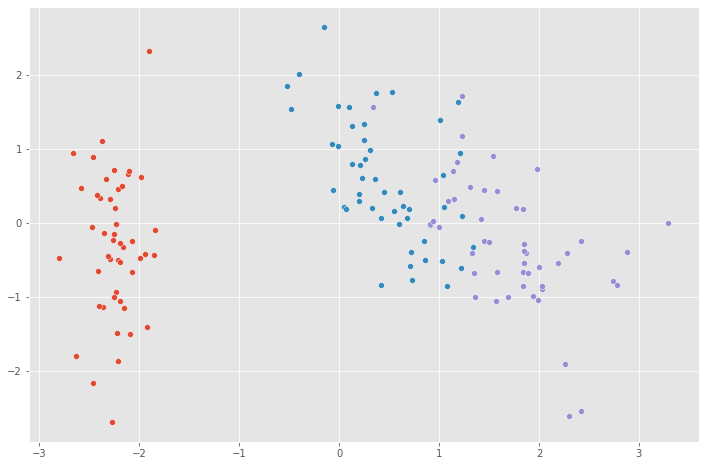

In [57]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[Y==species,0], X_pca[Y==species,1])